In [6]:
import matplotlib.pyplot as plt

In [2]:
from docscorer.configuration import ScorerConfiguration
from docscorer.docscorer import DocumentScorer
import json
import pandas as pd
config = ScorerConfiguration()
scorer = DocumentScorer(config)

In [3]:
path = "/mnt/d/Prompsit/Datos/HPLTv3_11_2025/hplt-v3-annotated-samples/"
documents = []
with open(path, "r", encoding="utf8") as a:
    for document in a:
        documents.append(json.loads(document))

In [ ]:
results = []
for document in documents:
    result = scorer.score_document(ref_lang="ita", ref_script="Latn", lang_segments=document["langs"], document_text=document["text"], doc_id="0", raw_score=False)
    results.append((document["id"], result, document["text"]))

In [4]:
df = pd.DataFrame(columns=["id", "results", "text", "language"])
# i = 0
for document in documents:
    result = scorer.score_document(ref_lang="ita", ref_script="latn", lang_segments=["ita_latn" if x == "it" else x for x in document["seg_langs"]], document_text=document["text"], doc_id=document["id"], raw_score=False)
    df.loc[df.shape[0]] = [document["id"], result, document["text"], result[2]]
    # i+=1
    # if i == 1000:
    #     break

Doc_name: '3e39d994408a90e3fcfdfa925dd193bb' - No available segments have been found on the target language
- Language: 'ita_latn' - Segment_languages: {'eng_latn', 'crh_latn', 'cmn_hant', 'lim_latn'}
Doc_name: 'e363bcab49b77ea7b993c077397991f3' - Only too short segments have been found on the target language
Doc_name: '5097008c6c9f52ac2a6181730e096578' - Only too short segments have been found on the target language
Doc_name: '26c39eb12286e7e3335e36df62860b7e' - Only too short segments have been found on the target language
Doc_name: '47628800c1694d1c7ffdcf42cfb9f3c0' - Only too short segments have been found on the target language
Doc_name: 'fa1e003fc62bb621677613cf5958a7fe' - Only too short segments have been found on the target language
Doc_name: '92805b81581801c32f3ffd7a45f3d18a' - No available segments have been found on the target language
- Language: 'ita_latn' - Segment_languages: {'eng_latn', 'afr_latn'}
Doc_name: 'c8f8ca956c3f0d07f4b87f741e1181b9' - No available segments hav

In [9]:
df.shape

(10000, 4)

In [19]:
x = df.sample(1).iloc[0]
# x = df.iloc[485]
print(x.results)
print(x.text)

[0.8362150539386195, 0.98, 1.0, 0.92, 1.0, 0.97, 0.97, 1.0, 0.81, 1.0, 0.87]
LaDistesa.blog: fiere
LaDistesa.blog
Vino e territorio. Musica e cultura. Pensieri, sogni e visioni di un vignaiolo indipendente.
Visualizzazione post con etichetta fiere. Mostra tutti i post
Visualizzazione post con etichetta fiere. Mostra tutti i post
mercoledì 13 maggio 2015
TerroirMarche, fra sogno e realtà.
Il primo maggio 2015 il nostro Consorzio TerroirMarche ha compiuto 2 anni.
Nato quasi per caso in un lungo viaggio comunitario a Montpellier, quello che sembrava un piccolo sogno è diventato una bella realtà: un luogo di aggregazione di vignaioli bio che condividono idee e pratiche per difendere e valorizzare il proprio "terroir". Banale a dirsi, impresa titanica a farsi - in una regione come la nostra dove fra campanili vecchi e nuovi, politica e politici vecchi e nuovi, consorterie e maneggi vecchi e nuovi, vere e proprie sperimentazioni "dal basso" è difficile farle crescere, specie nel mondo dell'a

In [9]:

df[df['text'].str.contains("Chiellini-Balotelli, l'Italia vince 2 a 1 e vola in Brasile!", case=False, na=False)]

,id,results,text,language
485,2765697,"[0.5631006306968124, 0.82, 1.0, 0.89, 1.0, 0.9...","Chiellini-Balotelli, l'Italia vince 2 a 1 e vo...",1.0


In [35]:
overall_score,
round(scores.language, 2),
round(scores.url, 2),
round(scores.punctuation, 2),
round(scores.singular_chars, 2),
round(scores.numbers, 2),
round(scores.repeated, 2),
round(scores.long_segments[0], 2),
round(scores.long_segments[1], 2),
round(scores.informativeness, 2),
round(scores.short_segments, 2),

3686

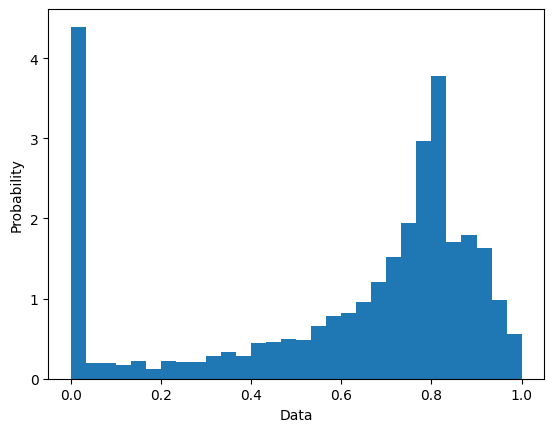

In [7]:
lista = df.results.to_list()
datos = [x[0] for x in lista]
plt.hist(datos, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [59]:
x = df[df.id =="fdb1538a6e69af4425bd376b1824a424"].iloc[0]
print(x.text)

Colloquial Expressions in French YUM YUM
0 Kommentare
Mehr Kommentare...


In [20]:
df["score"] = df["results"].apply(lambda x: x[0])

In [62]:
sel = df[df.score > 0.3].sample(1).iloc[0]
print(f"score: {round(sel.score,2)}")
print(f"lang: {sel.results[1]}\turl: {sel.results[2]}\tpunct: {sel.results[3]}")
print(f"emoji: {sel.results[4]}\tnumbe: {sel.results[5]}\trep_seg: {sel.results[6]}")
print(f"long: {sel.results[7]}\tvery_long: {sel.results[8]}\tinfo: {sel.results[9]}\tshort: {sel.results[10]}")
print()
print(sel.text)

score: 0.62
lang: 0.95	url: 1.0	punct: 0.86
emoji: 1.0	numbe: 0.87	rep_seg: 0.97
long: 0.0	very_long: 0.0	info: 1.0	short: 0.93

Assicurazione della Responsabilità Civile di Aziende Sanitarie Locali ed Aziende Ospedaliere QUESTIONARIO DA COMPILARE PER RICHIEDERE LA QUOTAZIONE DELLA POLIZZA RCT/O Da inviare a: STUDIO LOSASSO BROKER
Dettagli
Per CONTRAENTE si intende l impresa di diritto privato cui si propone l acquisto di questa assicurazione, per proprio conto e per conto delle altre persone assicurate. Per ASSICURATO si intende il CONTRAENTE,
Dettagli
Per CONTRAENTE si intende l impresa di diritto privato cui si propone l acquisto di questa assicurazione, per proprio conto e per conto delle altre persone assicurate. Per ASSICURATO si intende il CONTRAENTE,
Dettagli
TABELLA ALLEGATA Ancona - Firenze A N C O N A Borse 1997/98 Borse riservate a cittadini Allergologia ed Immunologia Clinica 1 Anestesia e rianimazione 10 Cardiologia 3 Chirurgia generale 2 Chirurgia plastica
Dettagli
Avvis

In [6]:
df["score_wds"] = df['results'].apply(lambda x: x[1] if isinstance(x, list) else None)

In [7]:
with open("/mnt/d/Prompsit/WDS/aarepo_github/datos/multiplied_exponent_3.txt", "a+", encoding="utf8") as a:
    for _, line in df.iterrows():
        e = line["results"]
        a.write(f"{e[0]}\t{e[1]}\n")

In [22]:
for x in df.iterrows():
    print (x)
    break

(0, id                                                     9568232
results      [0.8021550377550715, 0.8155990882290454, 0.96,...
text         Blog di Cinese Facile - Cinese Facile 2.0 di L...
language                                                  0.96
score_wds                                             0.815599
Name: 0, dtype: object)


In [14]:
df["results"].sample(10)

12585    [0.7191546175846028, 0.730929538613273, 0.94, ...
5808     [0.4747229786917153, 0.4264604779629531, 0.86,...
12429    [0.6749717162895132, 0.6649051029849461, 0.88,...
44494    [0.8160090434539742, 0.8275560028352816, 0.97,...
40796    [0.964352142874529, 0.9581646915842037, 0.98, ...
33992    [0.6508841955803522, 0.6798642202517802, 0.9, ...
12336    [0.5154179179084104, 0.5323739616822231, 0.65,...
32560    [0.5765208066374805, 0.5912930548163569, 0.87,...
42320    [0.30327067621198833, 0.3051720245327732, 0.45...
29807    [0.7211691930917, 0.7065742271416149, 0.92, 1....
Name: results, dtype: object

In [30]:
selec = df[df.score_wds<0].iloc[0]
print(selec.id)

6742417


In [35]:
i = [x for x in documents if x["id"] ==6742417][0]

In [37]:
i.keys()

dict_keys(['id', 'document_lang', 'scores', 'langs', 'text', 'url', 'collection'])

In [36]:
print(i["text"])

Filamenti a disposizione oggi - Filamento 3D | Stampa 3D | I3DP
Crea sito
Ricerca per:
Settembre 30, 2022
Trending Now
Stampa 3d | Home
News
News
Stampa 3D
Stampa 3D
Stampante 3D: Recensioni delle migliori!
Upgrade
Guide
Guide
Guide Software
Problemi comuni
Post Produzione
Software stampa 3D
Slicer
Modellazione 3D
Dialogo
Filamento 3D
Filamento 3D
Recensioni Filamento 3D
PLA
ABS
PETG
Speciali
Tecnologia
Recensioni Tech
Progetti
Negozio
Negozio Stampanti 3D
RICAMBI
Componenti meccanici
Guide Lineari
Cuscinetti
Giunti
Madrevite
Pulegge e cinghie
Raccordi pneumatici
Viti dadi rondelle
Strumenti meccanici
Lastre e Profilati
Lastre
Profilati in alluminio
Accessori per Profilati
Elettronica
Motore passo passo
Driver
Scheda di controllo
Relè ed Interruttori
Alimentatore
Schermi
Ventola
Schede di memoria SD
Materiale elettrico – Negozio I3DP
Cavi
Raccogli cavi
Strumenti elettricista
Gruppo estrusore – Negozio I3DP
Estrusore
Hotend
Gola
Nozzle
Termistore
Cartuccia riscaldante
Puleggia dentata
H

In [5]:
x= df.results.to_list()
resultados = [a[0] for a in x]

In [6]:
x = resultados

plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

NameError: name 'plt' is not defined

In [8]:
df.to_csv("/mnt/d/Prompsit/WDS/aarepo_github/antes_despues/falta_puntua/ita_despues.csv")

In [5]:
df_desp = pd.read_csv("/mnt/d/Prompsit/WDS/aarepo_github/antes_despues/falta_puntua/ita_despues.csv")

In [ ]:
df_antes

In [14]:
import ast
for n in range(1215+1, df.shape[0]):
    a = df.iloc[n]
    b = df_desp.iloc[n]
    if ast.literal_eval(b.results)[0] - a.results[0] >0.1:
        print(n)
        print(a.results[0])
        print(ast.literal_eval(b.results)[0])
        print(a.text)
        break

1351
0.27990520506729183
0.39762285412775833
Pagina 1 di 3 • 1, 2, 3
Vi metto un pò di foto varie, spero di far cosa gradita!
inizio da un pò di anguilline, in resina peso 12 grammi circa e lunghezza 12 cm: ho leggermente ritoccato il master dalle ultime che ho fatto, per renderlo un pò più carino! E alle spigole piace!!
Questi invece sono dei Needle, sempre in resina della lunghezza di 21 cm per 27 grammi di peso circa... mi stanno dando grosse soddisfazioni...
da questa foto si può giudicare un pò la foga col quale i serra lo attaccano! Ci hanno lasciato un dente attaccato!!
questo invece è un WTD fatto per un amico, legno poco più di 20 grammi.
ed ha voluto questa personalizzazione...chissa perchè...
e concludo con un popperone speciale che ha ricevuto un grande utente del mercatino... Allaria! Spero ti regali più catture dell'altro! Rimasto in bocca al serrone...
e questo è tutto! Se avete dubbi o domande piuttosto che critiche son bene accette!!
Ciao a tutti!
...SiMoN...- Numero d